# T-Score

In statistics, a t-score (or t-value) is a measure that quantifies how many standard errors an estimate is away from the hypothesized population parameter. It is commonly used when the population standard deviation is unknown and needs to be estimated from the sample.

The t-score of an estimate or observed value is calculated using the formula:
\begin{equation}
    t = \frac{\text{estimate} - \text{hypothesized\_parameter}}{\text{standard\_error\_of\_the\_estimate}}
\end{equation}

The standard error of the estimate depends on the specific statistic being calculated (e.g., mean, difference between means) and is often derived from the sample standard deviation.

The t-distribution is a probability distribution that is similar in shape to the normal distribution, but with heavier tails. The shape of the t-distribution depends on the degrees of freedom, which is related to the sample size. As the sample size increases, the t-distribution approaches the standard normal distribution.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

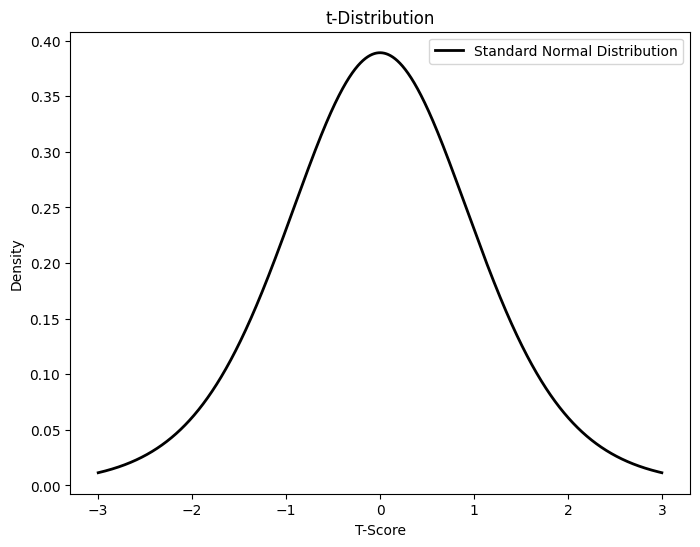

In [6]:
x = np.linspace(-3, 3, 2000)
df = 10 # Degrees of freedom
t_pdf = stats.t.pdf(x, df)
plt.figure(figsize=(8, 6))
plt.plot(x, t_pdf, 'black', lw=2, label='Standard Normal Distribution')


plt.title("t-Distribution")
plt.xlabel('T-Score')
plt.ylabel('Density')
plt.legend()
plt.show()

### Calculating and Interpretating t-scores

In [24]:
sample_data = [68, 70, 72, 74, 76]

hypothesis_mean = 74

sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

standard_error = sample_std/ np.sqrt(len(sample_data))
t_score = (sample_mean - hypothesis_mean)/standard_error

print(standard_error)
print(f"t_score = {t_score:.3f}")

1.4142135623730951
t_score = -1.414


### Interpretating the t-scores
- A positive t-score indicates that the sample mean is above the hypothesized mean.
- A negative t-score indicates that the sample mean below the hypothesized mean.
- The magnitude of the t-score indicated how many standard errors the sample mean is away from the hypothesized mean. A larger absolute t-score indicates a great deviation from the hypothesized mean.

#### Directly through mathematics involve in python

In [9]:
hypo_mean = 73

t_stat, p_value = stats.ttest_1samp(sample_data, hypo_mean)

print(f"t-score = {t_stat:.2f}")
print(f"p-value = {p_value:.5f}")

t-score = -0.71
p-value = 0.51852


- The t-statistic measures the strength of evidence against the null hypothesis. A larger absolute t-statistc indivates stronger evidence against the null hypothesis.
- The p-value represents the probability of observing a t-statistc as extreme as the one calculated, assuming the null hypothesis is true. A small p-value (typically below a significance  level such as 0.05) suggests rejecting the null hypothesis in favor of the alternative hypothesis.

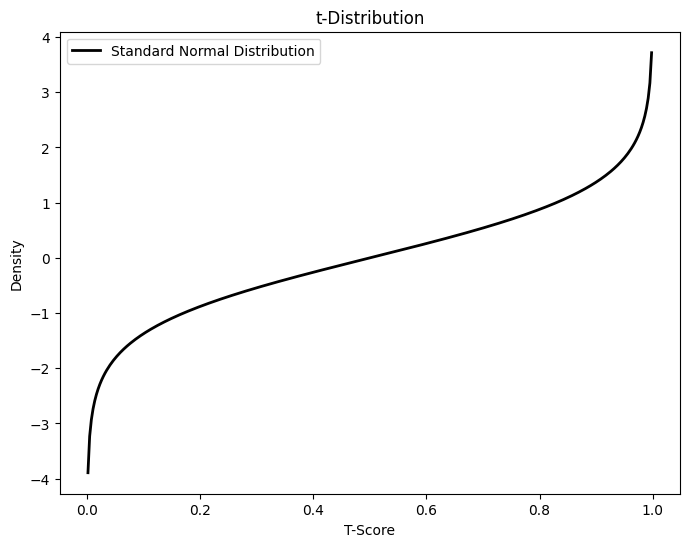

In [7]:
x = np.linspace(-3, 3, 2000)
df = 10 # Degrees of freedom
t_pdf = stats.t.ppf(x, df)
plt.figure(figsize=(8, 6))
plt.plot(x, t_pdf, 'black', lw=2, label='Standard Normal Distribution')


plt.title("t-Distribution")
plt.xlabel('T-Score')
plt.ylabel('Density')
plt.legend()
plt.show()

#### One Sample T-test:
A coffee shop claims their large cup contains 16 ounces. A skeptical customer takes a random sample of 10 large cups of coffee and measures their contents to determine if the mean volume differs from the claimed 16 ounces using a one-sample test.

In [50]:
sample_volume = [16.2, 15.8, 16.5, 15.7, 16.1, 15.9, 16.3, 16.0, 15.6, 16.4]
 
# Step 1: Hypthesis
  # Null hypothesis: the population mean equals to reference value (mu = mu_0)
  # Alternative hypothesis: the population mean doesnot equal to reference value (mu != mu_0)

# Step 2: Given 
  # sample size(n) = 20, sample mean (x_bar)=?, pop_std = ?, hypothesis_mean=16
hypothesis_mean = 16  

# Step 3: Calculating sample mean
sample_mean = np.mean(sample_volume)

'''Step 4: Assumptions: Since the population standard deviation is unknown, we will use the sample
standard deviation to estimate it. We also assume that the sample is a random 
sample and that the volume measurements are normally distributed.
'''
sample_std = np.std(sample_volume, ddof=9)

# Step 5: Calcule the t-score and standard_error 
standard_error = sample_std/(np.sqrt(len(sample_volume)))
t_score = (sample_mean - hypothesis_mean)/standard_error  # Same as t_stat in below

# Step 6: Find the critical t-value using t-distribution table with ddof=10-1=9
alpha = 0.05 
df = len(sample_volume)-1
critical_t_value = stats.t.ppf(1-alpha/2, df)

# Python way of finding t-stat and p-value
t_stat, p_value = stats.ttest_1samp(sample_volume, hypothesis_mean)
print(f't-stat: {t_stat:.5f}')
print(f'p-value= {p_value:.9f}')
print(f'Critical t-value: {critical_t_value}')

t-stat: 0.52223
p-value= 0.614117255
Critical t-value: 2.2621571628540993


#### Comparing t-score and critical t-value

In [51]:
if np.abs(t_stat) > critical_t_value:
    decision = "Reject the null Hypothesis."
else:
    decision = "Fail to Reject Null hypothesis."
print(decision)

Fail to Reject Null hypothesis.


#### Make a decision

In [52]:
if np.abs(t_stat) > critical_t_value:
    conclusion = "The mean volume of the coffee cups equals to the claimed 16 ounces."
else:
    conclusion = "The mean volume of the coffee cups doesnot equal from the claimed 16 ounces."
print(conclusion)

The mean volume of the coffee cups doesnot equal from the claimed 16 ounces.
